### Prelim EDA

**note** google colab doesn't have magic line, comment-in `line magic` in jupyter notebook

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import missingno as msno


import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# Read file from github as dataframe

df_spray = pd.read_csv('./datasets/predict-west-nile-virus/spray.csv/spray.csv')
df_test = pd.read_csv('./datasets/predict-west-nile-virus/test.csv/test.csv')
df_train = pd.read_csv('./datasets/predict-west-nile-virus/train.csv/train.csv')
df_weather = pd.read_csv('./datasets/predict-west-nile-virus/weather.csv/weather.csv')

In [4]:
# Define function for basic eda
# df.info can indicate null values, if any, so shall we keep null value function ?

def data_explore(df):
    #First two rows
    print("First two rows of data:")
    display(df.head(2))
    print()
    # Print shape of dataframe
    print(f"Shape: {df.shape}")
    print()
    # Print datatypes
    print("Columns & Datatypes: ")
    df.info()
    print()
    # Check for null values
    print("Null values:")
    if df.isnull().values.any() == False:
        print("None in Dataframe.")
    else:
        for col in df:
            print(f"{col}:{df[col].isnull().sum()}")
    print()
    # Count of distinct values
    print("Unique values (by Columns)")
    for col in df:
        print(f"{col}:{len(df[col].unique().tolist())}")
    print()
    # Inform if there are duplicates, if any
    if df.duplicated(subset=None, keep='first').any() == False:
      print("No duplicates present.")
    else:
        dup = df[df.duplicated(subset=None, keep='first')]
        print(f"{len(dup)} duplicates in {len(df)} rows.")

In [5]:
# Define function to review duplicates
# Only relevant for dataframe with duplicates
def review_dup(df): 
    print("First 5 rows of duplicates:")
    display(df[df.duplicated(subset=None, keep='first')].head())

In [6]:
# Define function to drop duplicates
# Only relevant for dataframe with duplicates
# need to reset index
def drop_dup(df):
    print(f"Initial rows: {df.shape[0]}")
    df.drop_duplicates(subset=None, inplace=True)
    print(f"Remaining rows: {df.shape[0]}")

### Spray data

In [7]:
# Review spray data
data_explore(df_spray)

First two rows of data:


,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163



Shape: (14835, 4)

Columns & Datatypes: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
Date         14835 non-null object
Time         14251 non-null object
Latitude     14835 non-null float64
Longitude    14835 non-null float64
dtypes: float64(2), object(2)
memory usage: 463.7+ KB

Null values:
Date:0
Time:584
Latitude:0
Longitude:0

Unique values (by Columns)
Date:10
Time:8584
Latitude:12887
Longitude:13007

541 duplicates in 14835 rows.


584 null values in `time` column. 541 duplicates. Further review to determine way to manage null value and duplicates.

In [8]:
# Review NaN value in spray data
df_spray.loc[df_spray['Time'].isnull()]

,Date,Time,Latitude,Longitude
1030,2011-09-07,NaN,41.987092,-87.794286
1031,2011-09-07,NaN,41.987620,-87.794382
1032,2011-09-07,NaN,41.988004,-87.794574
1033,2011-09-07,NaN,41.988292,-87.795486
1034,2011-09-07,NaN,41.988100,-87.796014
...,...,...,...,...
1609,2011-09-07,NaN,41.995876,-87.811615
1610,2011-09-07,NaN,41.995972,-87.810271
1611,2011-09-07,NaN,41.995684,-87.810319
1612,2011-09-07,NaN,41.994724,-87.810415


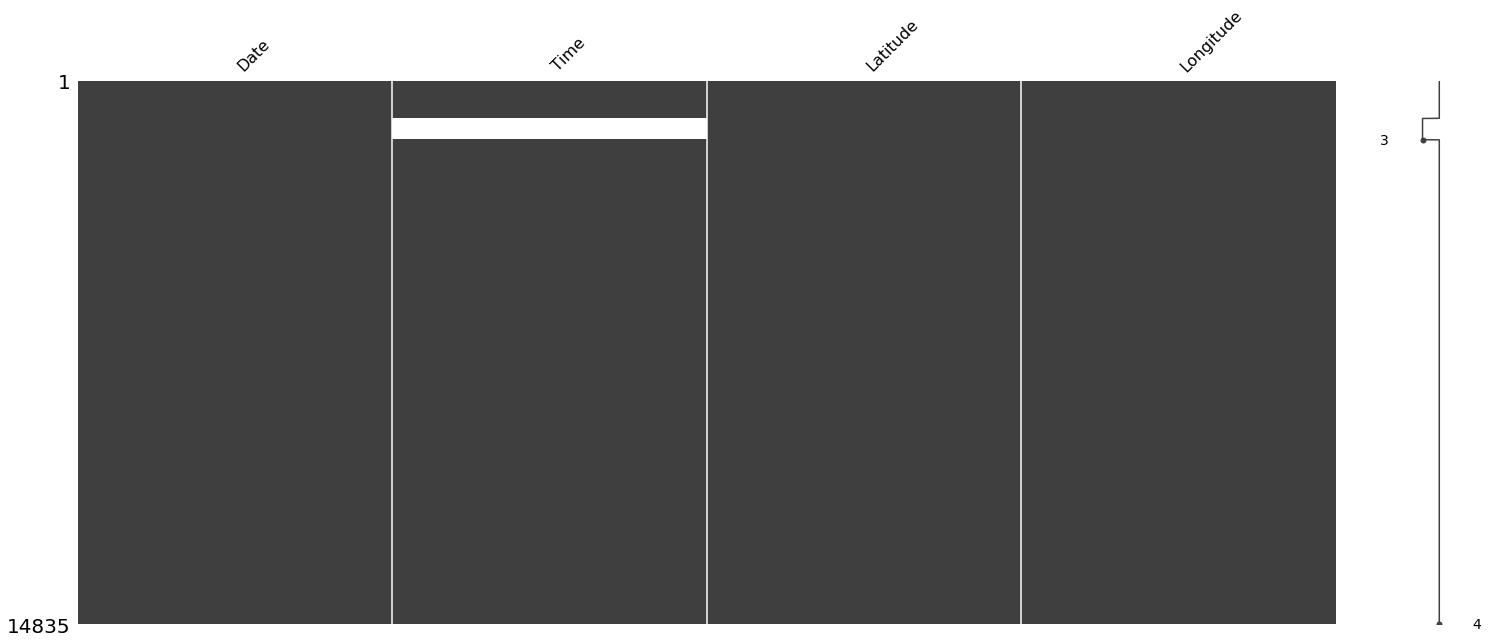

In [9]:
#Visualize missing values as a matrix 
#shows the amount and positions of missing values.
#right hand side is line plot for each row's data completeness
#all columns competed expcet Time coloumns
#Time columns has missing values in the beginning part of the dataframe
msno.matrix(df_spray) 

For Date-time data, Date column seems adequate to inform on areas sprayed over time. Can revisit to impute the NaN value later if the time values are selected as predictor.

In [10]:
# Review duplicate in dataframe
review_dup(df_spray)

First 5 rows of duplicates:


,Date,Time,Latitude,Longitude
485,2011-09-07,7:43:40 PM,41.983917,-87.793088
490,2011-09-07,7:44:32 PM,41.986460,-87.794225
491,2011-09-07,7:44:32 PM,41.986460,-87.794225
492,2011-09-07,7:44:32 PM,41.986460,-87.794225
493,2011-09-07,7:44:32 PM,41.986460,-87.794225


In [11]:
# Drop duplicates, reset index
drop_dup(df_spray)
df_spray.reset_index(inplace=True,drop=True)
df_spray.head()

Initial rows: 14835
Remaining rows: 14294


,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [12]:
# Dropping rows that latitude and longitude
# lie outside the range of the train and test data
df_test.describe()

,Id,Block,Latitude,Longitude,AddressAccuracy
count,116293.000000,116293.000000,116293.000000,116293.000000,116293.000000
mean,58147.000000,41.131100,41.849389,-87.693658,7.954357
std,33571.041765,24.864726,0.106593,0.080699,1.252733
min,1.000000,10.000000,41.644612,-87.930995,3.000000
25%,29074.000000,18.000000,41.753411,-87.750938,8.000000
50%,58147.000000,39.000000,41.862292,-87.694991,8.000000
75%,87220.000000,61.000000,41.951866,-87.648860,9.000000
max,116293.000000,98.000000,42.017430,-87.531635,9.000000


In [13]:
# we have to remove rows with longitude greater than -88.0
# and latitude greatrea than 42.1
df_spray.describe()

,Latitude,Longitude
count,14294.000000,14294.000000
mean,41.901739,-87.734512
std,0.105100,0.067599
min,41.713925,-88.096468
25%,41.782669,-87.789607
50%,41.937578,-87.724781
75%,41.977217,-87.692107
max,42.395983,-87.586727


In [14]:
df_s = df_spray[df_spray['Latitude'] <= 42.1]

In [15]:
df_s.describe()

,Latitude,Longitude
count,14199.000000,14199.000000
mean,41.898456,-87.732111
std,0.097461,0.061096
min,41.713925,-87.871023
25%,41.782290,-87.788612
50%,41.937205,-87.724390
75%,41.976710,-87.691572
max,42.018907,-87.586727


### Test data

In [16]:
# Review test data
data_explore(df_test)

First two rows of data:


,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9



Shape: (116293, 11)

Columns & Datatypes: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116293 entries, 0 to 116292
Data columns (total 11 columns):
Id                        116293 non-null int64
Date                      116293 non-null object
Address                   116293 non-null object
Species                   116293 non-null object
Block                     116293 non-null int64
Street                    116293 non-null object
Trap                      116293 non-null object
AddressNumberAndStreet    116293 non-null object
Latitude                  116293 non-null float64
Longitude                 116293 non-null float64
AddressAccuracy           116293 non-null int64
dtypes: float64(2), int64(3), object(6)
memory usage: 9.8+ MB

Null values:
None in Dataframe.

Unique values (by Columns)
Id:116293
Date:95
Address:151
Species:8
Block:65
Street:139
Trap:149
AddressNumberAndStreet:151
Latitude:151
Longitude:151
AddressAccuracy:4

No duplicates present.


### Train data

In [17]:
# Review train data
data_explore(df_train)

First two rows of data:


,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0



Shape: (10506, 12)

Columns & Datatypes: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
Date                      10506 non-null object
Address                   10506 non-null object
Species                   10506 non-null object
Block                     10506 non-null int64
Street                    10506 non-null object
Trap                      10506 non-null object
AddressNumberAndStreet    10506 non-null object
Latitude                  10506 non-null float64
Longitude                 10506 non-null float64
AddressAccuracy           10506 non-null int64
NumMosquitos              10506 non-null int64
WnvPresent                10506 non-null int64
dtypes: float64(2), int64(4), object(6)
memory usage: 985.1+ KB

Null values:
None in Dataframe.

Unique values (by Columns)
Date:95
Address:138
Species:7
Block:64
Street:128
Trap:136
AddressNumberAndStreet:138
Latitude:138
Longitude:138
AddressAccuracy:4
NumMosquitos:50
Wn

On test and train datasets, observe there is more test data than train data. The columns `NumMosquitos` and `WnvPresent` are absent in test data. No NaN, 813 duplicates in train set.

In [18]:
# Review duplicate in dataframe
review_dup(df_train)

First 5 rows of duplicates:


,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
99,2007-06-26,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,1,0
295,2007-07-11,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,50,0
351,2007-07-11,"3500 West 116th Street, Chicago, IL 60655, USA",CULEX PIPIENS/RESTUANS,35,W 116TH ST,T158,"3500 W 116TH ST, Chicago, IL",41.682587,-87.707973,9,50,0
353,2007-07-11,"3500 West 116th Street, Chicago, IL 60655, USA",CULEX PIPIENS/RESTUANS,35,W 116TH ST,T158,"3500 W 116TH ST, Chicago, IL",41.682587,-87.707973,9,50,0
512,2007-07-18,"3300 West Randolph Street, Chicago, IL 60612, USA",CULEX RESTUANS,33,E RANDOLPH ST,T044,"3300 E RANDOLPH ST, Chicago, IL",41.883284,-87.705085,8,1,0


The `Latitiude` and `Longitude` information should be sufficient as proxies for Address information. `Address`, `Block`, `Street`, `AddressNumberAndStreet`,`AddressAccuracy` not need to use.

In [19]:
# Drop duplicates, reset index
drop_dup(df_train)
df_train.reset_index(inplace=True,drop=True)

Initial rows: 10506
Remaining rows: 9693


In [20]:
#drop Address, Block, Street, AddressNumberAndStreet 
drop_cols =['Address', 'Block', 'Street', 'AddressNumberAndStreet','AddressAccuracy']
df_train.drop(drop_cols, axis=1,inplace=True)
df_test.drop(drop_cols,axis=1,inplace=True)

In [21]:
df_train.head()

,Date,Species,Trap,Latitude,Longitude,NumMosquitos,WnvPresent
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,41.954690,-87.800991,1,0
1,2007-05-29,CULEX RESTUANS,T002,41.954690,-87.800991,1,0
2,2007-05-29,CULEX RESTUANS,T007,41.994991,-87.769279,1,0
3,2007-05-29,CULEX PIPIENS/RESTUANS,T015,41.974089,-87.824812,1,0
4,2007-05-29,CULEX RESTUANS,T015,41.974089,-87.824812,4,0


In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9693 entries, 0 to 9692
Data columns (total 7 columns):
Date            9693 non-null object
Species         9693 non-null object
Trap            9693 non-null object
Latitude        9693 non-null float64
Longitude       9693 non-null float64
NumMosquitos    9693 non-null int64
WnvPresent      9693 non-null int64
dtypes: float64(2), int64(2), object(3)
memory usage: 530.2+ KB


In [23]:
#making the variable into correct datatype
# Make Date into datetime
df_train['Date'] = pd.to_datetime(df_train['Date'])
df_test['Date']= pd.to_datetime(df_test['Date'])

### Weather data

In [24]:
# Review weather data
data_explore(df_weather)

First two rows of data:


,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6



Shape: (2944, 22)

Columns & Datatypes: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
Station        2944 non-null int64
Date           2944 non-null object
Tmax           2944 non-null int64
Tmin           2944 non-null int64
Tavg           2944 non-null object
Depart         2944 non-null object
DewPoint       2944 non-null int64
WetBulb        2944 non-null object
Heat           2944 non-null object
Cool           2944 non-null object
Sunrise        2944 non-null object
Sunset         2944 non-null object
CodeSum        2944 non-null object
Depth          2944 non-null object
Water1         2944 non-null object
SnowFall       2944 non-null object
PrecipTotal    2944 non-null object
StnPressure    2944 non-null object
SeaLevel       2944 non-null object
ResultSpeed    2944 non-null float64
ResultDir      2944 non-null int64
AvgSpeed       2944 non-null object
dtypes: float64(1), int64(5), object(16)
memory usage: 506.1+ K

From data dictionary of weather data, `M` infers missing value. For further review and processing.

In [25]:
#replacing M with np.nan to check the sum of null values
df_weather.replace('M', np.NaN, inplace=True)
df_weather.isnull().sum().sort_values(ascending=False)

Water1         2944
Depart         1472
SnowFall       1472
Depth          1472
Tavg             11
Cool             11
Heat             11
SeaLevel          9
StnPressure       4
WetBulb           4
AvgSpeed          3
PrecipTotal       2
Date              0
Tmax              0
Tmin              0
Sunrise           0
DewPoint          0
ResultDir         0
Sunset            0
CodeSum           0
ResultSpeed       0
Station           0
dtype: int64

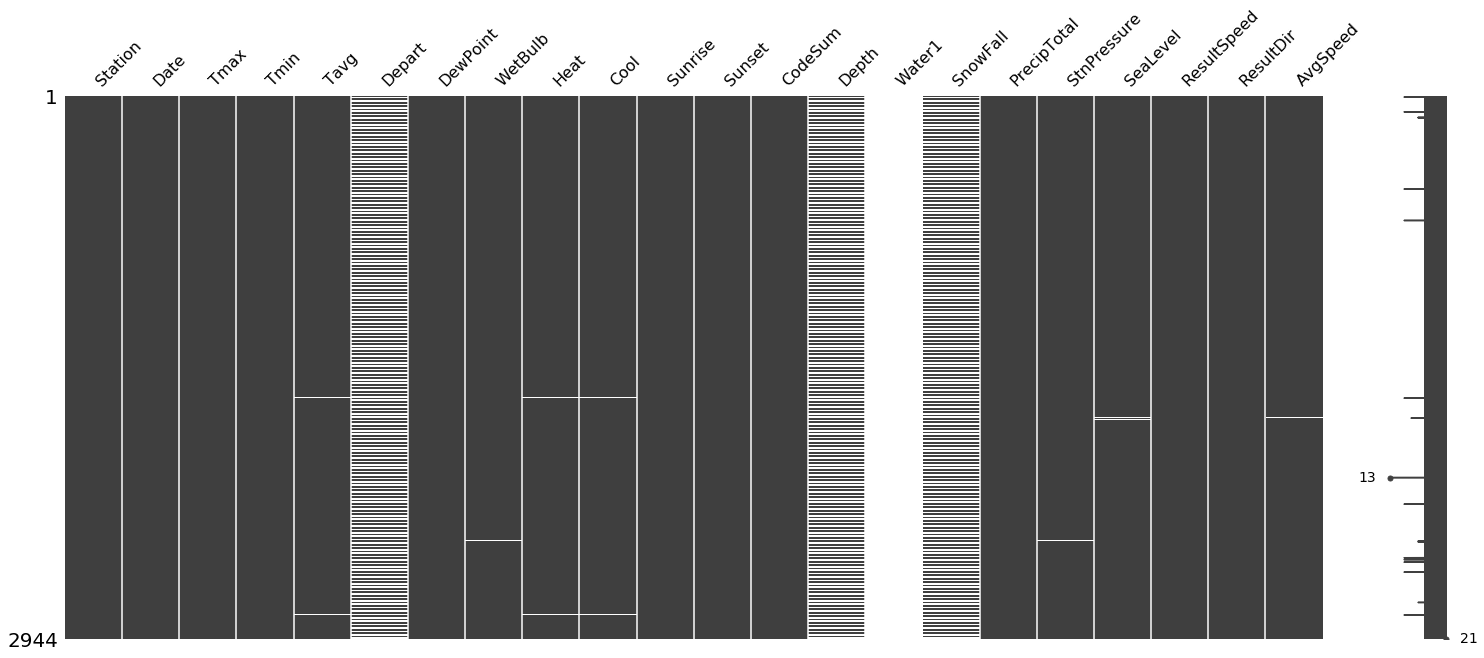

In [26]:
#Visualize missing values as a matrix 
#shows the amount and positions of missing values.
#right hand side is line plot for each row's data completeness
#Water1,Depart,SnowfallDepth have high missing value
#a few missing values on Tavg,Cool, Heat,SeaLevel, StnPressure, WetBulb,AvgSpeed,PrecipTotal
#we will decide which columns to keep
msno.matrix(df_weather) 

Decision points for weather data cleaning.
- Many 'M' values (missing values): Dont use columns with more than 1000 M entries.
- Replace 'T' values with 0.5* the minimum unit
- Temperature: `Cool` and `Heat` is difference of Tavg and 65F base. We could impute missing values or not use.  Similarly, can choose not to use `Tmax`, `Tmin`. 
- Pressure: Use `Stnpressure`(Inches Hg). Not use `Sea level`. Can impute by last closest/mode/median values.
- Humidity: Use `Dewpoint`(F); no missing data over `Wetbulb`(F).
- Wind Speed: Use `ResultSpeed`(MPH). Not use `AvgSpeed`, `ResultDir`.
- DayLight: Keep `Sunrise` and `Sunset`; feature engineer `daylight` length, then drop `Sunrise` and `Sunset`.
- `CodeSum` not use. Is descriptor of weather phenomenon; redundant
- Keep `station2`, impute '-' values.


In [27]:
# Weather columns to use
wcols_keep = ['Tavg','StnPressure','DewPoint','PrecipTotal','Date','Sunrise','Sunset','ResultSpeed','Station']
# copy of dataframe
df_w = df_weather[wcols_keep].copy()
df_w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 9 columns):
Tavg           2933 non-null object
StnPressure    2940 non-null object
DewPoint       2944 non-null int64
PrecipTotal    2942 non-null object
Date           2944 non-null object
Sunrise        2944 non-null object
Sunset         2944 non-null object
ResultSpeed    2944 non-null float64
Station        2944 non-null int64
dtypes: float64(1), int64(2), object(6)
memory usage: 207.1+ KB


In [28]:
#looking up the missing value in StnPressure
#4 missing values 
df_w[df_w['StnPressure'].isnull()].any(axis = 1)

87      True
848     True
2410    True
2411    True
dtype: bool

In [29]:
#looking up the missing value in Tavg
#11 missing values 
df_w[df_w['Tavg'].isnull()].any(axis = 1)

7       True
505     True
675     True
1637    True
2067    True
2211    True
2501    True
2511    True
2525    True
2579    True
2811    True
dtype: bool

In [30]:
# Code block for weather data imputation/ conversion
# Code to impute Tavg
#calculateing the temperature average 
fill_Tavg = round((df_weather['Tmax'] + df_weather['Tmin'])/2, 2)
fill_Tavg =fill_Tavg.astype(int)
#looking for the index of missing value 
df_w[df_w['Tavg'].isna()].index
#impute the missing value by the calculated Temperature average
for avg in df_w[df_w['Tavg'].isna()].index:
    df_w['Tavg'].loc[avg] = int(fill_Tavg[avg])

# Code to impute Stnpressure
df_w['StnPressure'].fillna(df_w['StnPressure'].median(),inplace=True)


# Code to impute Wetbulb

# Code to impute PrecipTotal
df_w['PrecipTotal'].fillna(method='ffill', inplace=True)
# Code to convert Date
df_w['Date'] = pd.to_datetime(df_w['Date'])

# Code to impute Sunrise and Sunset for Station 2.
# Difference in sunrise/set times between stations should not be significant
"""Replace '-' for values with NaN."""
"""Use last valid observation forward to next valid one."""
df_w['Sunrise'].replace('-', np.NaN, inplace=True)
df_w['Sunrise'].fillna(method='ffill', inplace=True)
df_w['Sunset'].replace('-', np.NaN, inplace=True)
df_w['Sunset'].fillna(method='ffill', inplace=True)

# Code to calculate daylight
df_w['Sunrise']=pd.to_numeric(df_w['Sunrise'])
df_w['Sunset']=pd.to_numeric(df_w['Sunset'])
df_w['daylight'] = df_w['Sunset']-df_w['Sunrise']
df_w['daylight'] = df_w['daylight'].map(lambda x: int(str(x)[:2]) + int(str(x)[-2:])/60)
df_w.head(10)

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Tavg,StnPressure,DewPoint,PrecipTotal,Date,Sunrise,Sunset,ResultSpeed,Station,daylight
0,67,29.10,51,0.00,2007-05-01,448,1849,1.7,1,14.016667
1,68,29.18,51,0.00,2007-05-01,448,1849,2.7,2,14.016667
2,51,29.38,42,0.00,2007-05-02,447,1850,13.0,1,14.050000
3,52,29.44,42,0.00,2007-05-02,447,1850,13.3,2,14.050000
4,56,29.39,40,0.00,2007-05-03,446,1851,11.7,1,14.083333
5,58,29.46,40,0.00,2007-05-03,446,1851,12.9,2,14.083333
6,58,29.31,41,T,2007-05-04,444,1852,10.4,1,14.133333
7,64,29.36,42,0.00,2007-05-04,444,1852,10.1,2,14.133333
8,60,29.40,38,T,2007-05-05,443,1853,11.7,1,14.166667
9,60,29.46,39,T,2007-05-05,443,1853,11.2,2,14.166667


In [31]:
# imputing T values. T stands for trace values, more than 0 but lower than the smallest measurement
# only PreciptTotal needs to have imputed T
df_w.isin(['  T']).sum()

Tavg             0
StnPressure      0
DewPoint         0
PrecipTotal    318
Date             0
Sunrise          0
Sunset           0
ResultSpeed      0
Station          0
daylight         0
dtype: int64

In [32]:
# getting the list of unique values for PrecipTotal
sorted(tuple(df_w['PrecipTotal'].unique()))[:5]

['  T', '0.00', '0.01', '0.02', '0.03']

In [33]:
# taking the minimum measurement
min_measurement = sorted(tuple(df_w['PrecipTotal'].unique()))[2]

In [34]:
# we will take half the minimum value
df_w['PrecipTotal'].replace('  T',float(min_measurement) * 0.5, inplace=True)

In [35]:
#checking the datatype 
df_w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 10 columns):
Tavg           2944 non-null object
StnPressure    2944 non-null object
DewPoint       2944 non-null int64
PrecipTotal    2944 non-null object
Date           2944 non-null datetime64[ns]
Sunrise        2944 non-null int64
Sunset         2944 non-null int64
ResultSpeed    2944 non-null float64
Station        2944 non-null int64
daylight       2944 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 230.1+ KB


In [36]:
#making the variable weather to correct datatype

df_w['Tavg'] = df_w['Tavg'].astype(int)
df_w['StnPressure'] = df_w['StnPressure'].astype(float)
df_w['DewPoint'] = df_w['DewPoint'].astype(float)
df_w['PrecipTotal'] = df_w['PrecipTotal'].astype(float)



In [37]:
#making the sunrise and sunset into correct datatype
# Make Date into datetime
df_w['Sunrise'] = pd.to_datetime(df_w['Sunrise'])
df_w['Sunset'] = pd.to_datetime(df_w['Sunset'])


In [38]:
df_w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 10 columns):
Tavg           2944 non-null int32
StnPressure    2944 non-null float64
DewPoint       2944 non-null float64
PrecipTotal    2944 non-null float64
Date           2944 non-null datetime64[ns]
Sunrise        2944 non-null datetime64[ns]
Sunset         2944 non-null datetime64[ns]
ResultSpeed    2944 non-null float64
Station        2944 non-null int64
daylight       2944 non-null float64
dtypes: datetime64[ns](3), float64(5), int32(1), int64(1)
memory usage: 218.6 KB


### EDA

Having 2 different weather stations creates too many variables, therefore we are looking into merging them into 1 but this is dependent on the factors having little to no variance.

In [39]:
#function boxplot:
def subplot_boxplots(dataframe, list_of_columns):
     # Makes sure you have enough rows
    nrows = int(np.ceil(len(list_of_columns)/5)) 
    
  
    fig, ax = plt.subplots(nrows=nrows, ncols=4, figsize=(16,9), sharey=True) 
    plt.subplots_adjust(hspace=0.3)
    
    # Ravel turns a matrix into a vector, which is easier to iterate
    ax = ax.ravel()
    
    # Gives us an index value to get into all our lists
    for i, column in enumerate(list_of_columns): 
        #plotting a boxplot
        sns.boxplot(x=dataframe['Station'], y=dataframe[column], ax=ax[i])
        #setting y label
        ax[i].set_ylabel(column,fontsize=13)
        #setting x label
        ax[i].set_xlabel('Station',fontsize=13)

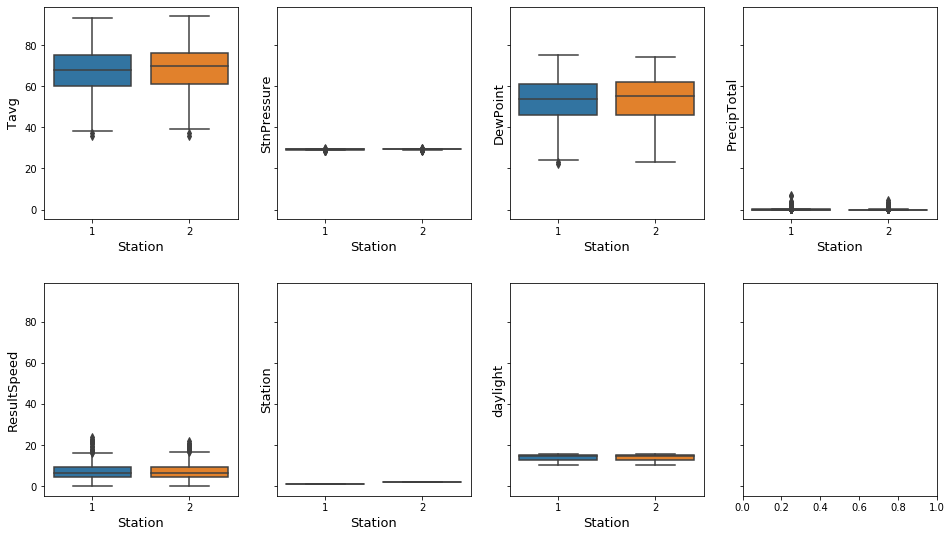

In [40]:
list_of_columns = (df_w.drop(['Sunrise', 'Sunset', 'Date'],axis=1).columns)
subplot_boxplots(df_w,list_of_columns)

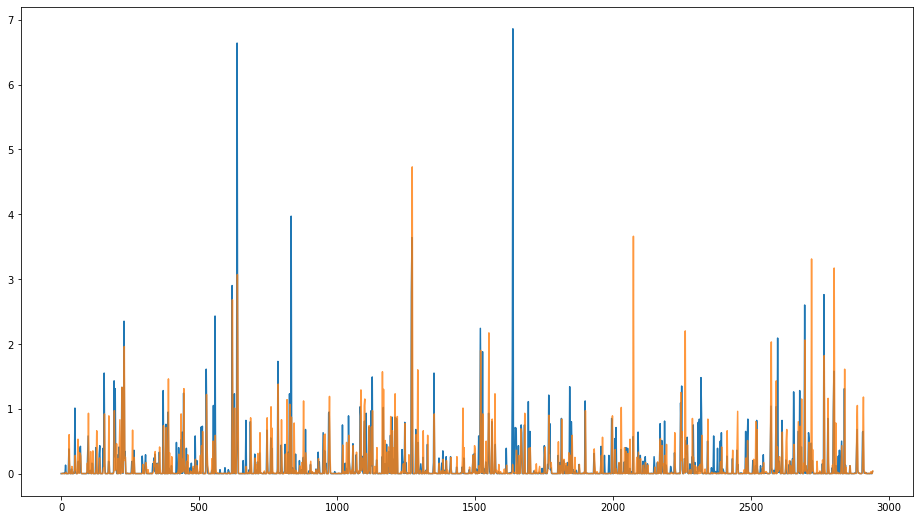

In [41]:
# lineplot overlap of the two stations for preciptotal
plt.figure(figsize=(16,9))
plt.plot(df_w[df_w['Station']==1]['PrecipTotal'])
plt.plot(df_w[df_w['Station']==2]['PrecipTotal'],alpha=00.8)

In [42]:
# since the two weather stations have little variance among its features, 
# we will average them out into a single station

df_w_1 = df_w.iloc[::2,:].drop(['Sunrise', 'Sunset', 'Date'],axis=1)
df_w_2 = df_w.iloc[1::2,:].drop(['Sunrise', 'Sunset', 'Date'],axis=1)

In [43]:
# checking if df_w_1 is station 1 only
df_w_1.reset_index(inplace=True)

In [44]:
# checking if df_w_1 is station 2 only
df_w_2.reset_index(inplace=True)

In [45]:
# getting the mean of station 1 and station 2
df_w_mean = df_w_1.add(df_w_2)/2

In [46]:
df_w_mean.head()

,index,Tavg,StnPressure,DewPoint,PrecipTotal,ResultSpeed,Station,daylight
0,0.5,67.5,29.140,51.0,0.0000,2.20,1.5,14.016667
1,2.5,51.5,29.410,42.0,0.0000,13.15,1.5,14.050000
2,4.5,57.0,29.425,40.0,0.0000,12.30,1.5,14.083333
3,6.5,61.0,29.335,41.5,0.0025,10.25,1.5,14.133333
4,8.5,60.0,29.430,38.5,0.0050,11.45,1.5,14.166667


In [47]:
# checking final df_w_mean
df_w_mean.drop(['index','Station'],axis=1, inplace=True)

In [48]:
df_w

,Tavg,StnPressure,DewPoint,PrecipTotal,Date,Sunrise,Sunset,ResultSpeed,Station,daylight
0,67,29.10,51.0,0.000,2007-05-01,1970-01-01 00:00:00.000000448,1970-01-01 00:00:00.000001849,1.7,1,14.016667
1,68,29.18,51.0,0.000,2007-05-01,1970-01-01 00:00:00.000000448,1970-01-01 00:00:00.000001849,2.7,2,14.016667
2,51,29.38,42.0,0.000,2007-05-02,1970-01-01 00:00:00.000000447,1970-01-01 00:00:00.000001850,13.0,1,14.050000
3,52,29.44,42.0,0.000,2007-05-02,1970-01-01 00:00:00.000000447,1970-01-01 00:00:00.000001850,13.3,2,14.050000
4,56,29.39,40.0,0.000,2007-05-03,1970-01-01 00:00:00.000000446,1970-01-01 00:00:00.000001851,11.7,1,14.083333
...,...,...,...,...,...,...,...,...,...,...
2939,45,29.42,34.0,0.000,2014-10-29,1970-01-01 00:00:00.000000620,1970-01-01 00:00:00.000001650,8.5,2,10.500000
2940,42,29.34,34.0,0.000,2014-10-30,1970-01-01 00:00:00.000000622,1970-01-01 00:00:00.000001649,5.1,1,10.450000
2941,45,29.41,35.0,0.005,2014-10-30,1970-01-01 00:00:00.000000622,1970-01-01 00:00:00.000001649,5.9,2,10.450000
2942,40,29.49,25.0,0.030,2014-10-31,1970-01-01 00:00:00.000000623,1970-01-01 00:00:00.000001647,22.6,1,10.400000


In [49]:
# adding back date to df_w_mean
df_w_mean['Date'] = df_w.iloc[::2,:].reset_index()['Date']

In [50]:
df_w_mean

,Tavg,StnPressure,DewPoint,PrecipTotal,ResultSpeed,daylight,Date
0,67.5,29.140,51.0,0.0000,2.20,14.016667,2007-05-01
1,51.5,29.410,42.0,0.0000,13.15,14.050000,2007-05-02
2,57.0,29.425,40.0,0.0000,12.30,14.083333,2007-05-03
3,61.0,29.335,41.5,0.0025,10.25,14.133333,2007-05-04
4,60.0,29.430,38.5,0.0050,11.45,14.166667,2007-05-05
...,...,...,...,...,...,...,...
1467,65.5,28.960,51.5,0.0100,12.35,10.583333,2014-10-27
1468,57.0,29.190,39.0,0.0175,14.40,10.533333,2014-10-28
1469,44.0,29.390,33.0,0.0000,9.00,10.500000,2014-10-29
1470,43.5,29.375,34.5,0.0025,5.50,10.450000,2014-10-30


In [51]:
df_train

,Date,Species,Trap,Latitude,Longitude,NumMosquitos,WnvPresent
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,41.954690,-87.800991,1,0
1,2007-05-29,CULEX RESTUANS,T002,41.954690,-87.800991,1,0
2,2007-05-29,CULEX RESTUANS,T007,41.994991,-87.769279,1,0
3,2007-05-29,CULEX PIPIENS/RESTUANS,T015,41.974089,-87.824812,1,0
4,2007-05-29,CULEX RESTUANS,T015,41.974089,-87.824812,4,0
...,...,...,...,...,...,...,...
9688,2013-09-26,CULEX PIPIENS/RESTUANS,T035,41.763733,-87.742302,6,1
9689,2013-09-26,CULEX PIPIENS/RESTUANS,T231,41.987280,-87.666066,5,0
9690,2013-09-26,CULEX PIPIENS/RESTUANS,T232,41.912563,-87.668055,1,0
9691,2013-09-26,CULEX PIPIENS/RESTUANS,T233,42.009876,-87.807277,5,0


In [52]:
df_train_w = pd.merge(df_train, df_w_mean, on='Date')

In [53]:
df_train_w.head()

,Date,Species,Trap,Latitude,Longitude,NumMosquitos,WnvPresent,Tavg,StnPressure,DewPoint,PrecipTotal,ResultSpeed,daylight
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,41.954690,-87.800991,1,0,75.5,29.415,58.5,0.0,5.8,15.6
1,2007-05-29,CULEX RESTUANS,T002,41.954690,-87.800991,1,0,75.5,29.415,58.5,0.0,5.8,15.6
2,2007-05-29,CULEX RESTUANS,T007,41.994991,-87.769279,1,0,75.5,29.415,58.5,0.0,5.8,15.6
3,2007-05-29,CULEX PIPIENS/RESTUANS,T015,41.974089,-87.824812,1,0,75.5,29.415,58.5,0.0,5.8,15.6
4,2007-05-29,CULEX RESTUANS,T015,41.974089,-87.824812,4,0,75.5,29.415,58.5,0.0,5.8,15.6


In [54]:
df_w_mean.head()

,Tavg,StnPressure,DewPoint,PrecipTotal,ResultSpeed,daylight,Date
0,67.5,29.140,51.0,0.0000,2.20,14.016667,2007-05-01
1,51.5,29.410,42.0,0.0000,13.15,14.050000,2007-05-02
2,57.0,29.425,40.0,0.0000,12.30,14.083333,2007-05-03
3,61.0,29.335,41.5,0.0025,10.25,14.133333,2007-05-04
4,60.0,29.430,38.5,0.0050,11.45,14.166667,2007-05-05


C:\Users\user\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


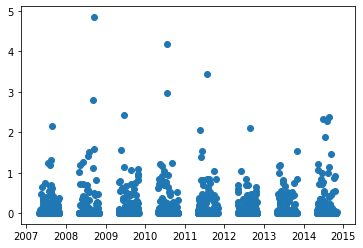

In [55]:
plt.scatter(x= df_w_mean['Date'], y=df_w_mean['PrecipTotal'])

In [56]:
df_w_mean_2 = df_w_mean.copy()

In [57]:
df_w_mean_2.set_index(pd.DatetimeIndex(df_w_mean_2['Date']), inplace=True)

In [58]:
df_w_mean_2

,Tavg,StnPressure,DewPoint,PrecipTotal,ResultSpeed,daylight,Date
Date,,,,,,,
2007-05-01,67.5,29.140,51.0,0.0000,2.20,14.016667,2007-05-01
2007-05-02,51.5,29.410,42.0,0.0000,13.15,14.050000,2007-05-02
2007-05-03,57.0,29.425,40.0,0.0000,12.30,14.083333,2007-05-03
2007-05-04,61.0,29.335,41.5,0.0025,10.25,14.133333,2007-05-04
2007-05-05,60.0,29.430,38.5,0.0050,11.45,14.166667,2007-05-05
...,...,...,...,...,...,...,...
2014-10-27,65.5,28.960,51.5,0.0100,12.35,10.583333,2014-10-27
2014-10-28,57.0,29.190,39.0,0.0175,14.40,10.533333,2014-10-28
2014-10-29,44.0,29.390,33.0,0.0000,9.00,10.500000,2014-10-29


In [59]:
# Code modified from code written by Matthew Garton.

def plot_series(df, cols=None, title='Title', xlab=None, ylab=None, steps=1):
    
    # Set figure size to be (18, 9).
    plt.figure(figsize=(18,9))
    
    # Iterate through each column name.
    for col in cols:
            
        # Generate a line plot of the column name.
        # You only have to specify Y, since our
        # index will be a datetime index.
        plt.plot(df[col])
        
    # Generate title and labels.
    plt.title(title, fontsize=26)
    plt.xlabel(xlab, fontsize=20)
    plt.ylabel(ylab, fontsize=20)
    
    # Enlarge tick marks.
    plt.yticks(fontsize=18)
    plt.xticks(df.index[0::steps], fontsize=12, rotation=45);

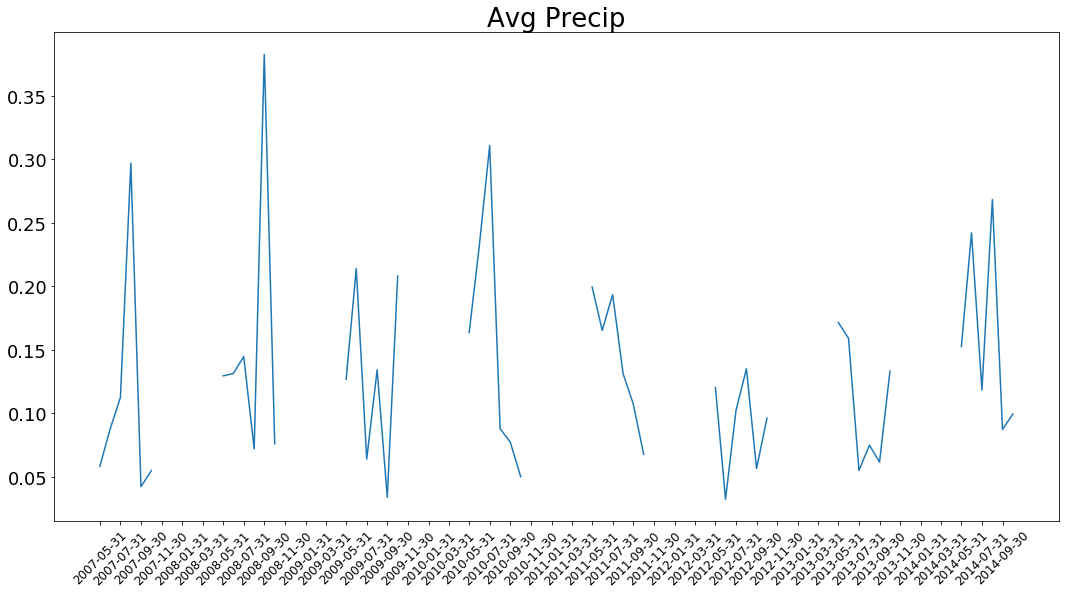

In [60]:
plot_series(df_w_mean_2.resample('M').mean(), ['PrecipTotal'], title='Avg Precip',steps=2)

In [61]:
df_train_w_2 = df_train_w.copy()

In [62]:
df_train_w_2.head()

,Date,Species,Trap,Latitude,Longitude,NumMosquitos,WnvPresent,Tavg,StnPressure,DewPoint,PrecipTotal,ResultSpeed,daylight
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,41.954690,-87.800991,1,0,75.5,29.415,58.5,0.0,5.8,15.6
1,2007-05-29,CULEX RESTUANS,T002,41.954690,-87.800991,1,0,75.5,29.415,58.5,0.0,5.8,15.6
2,2007-05-29,CULEX RESTUANS,T007,41.994991,-87.769279,1,0,75.5,29.415,58.5,0.0,5.8,15.6
3,2007-05-29,CULEX PIPIENS/RESTUANS,T015,41.974089,-87.824812,1,0,75.5,29.415,58.5,0.0,5.8,15.6
4,2007-05-29,CULEX RESTUANS,T015,41.974089,-87.824812,4,0,75.5,29.415,58.5,0.0,5.8,15.6


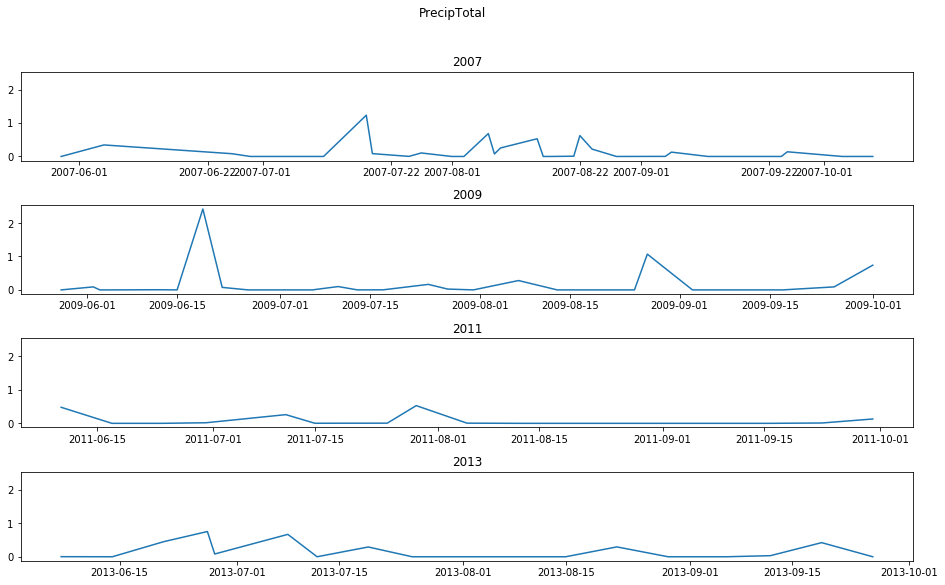

In [64]:
df_train_w_2.set_index(pd.DatetimeIndex(df_train_w_2['Date']), inplace=True)

ts_2007 = pd.to_datetime('1/1/2007')
ts_2008 = pd.to_datetime('1/1/2008')
ts_2009 = pd.to_datetime('1/1/2009')
ts_2010 = pd.to_datetime('1/1/2010')
ts_2011 = pd.to_datetime('1/1/2011')
ts_2012 = pd.to_datetime('1/1/2012')
ts_2013 = pd.to_datetime('1/1/2013')


fig, (ax1, ax2, ax3, ax4)  = plt.subplots(nrows=4,ncols=1, figsize=(16,9), sharey=True)
plt.subplots_adjust(hspace=0.5)
plt.suptitle('PrecipTotal')

#2007
ax1.plot(df_train_w_2[df_train_w_2['Date'] < ts_2008]['PrecipTotal'])
ax1.set_title('2007')
#2009
ax2.plot(df_train_w_2[(df_train_w_2['Date'] < ts_2010) & (df_train_w_2['Date'] > ts_2009)]['PrecipTotal'])
ax2.set_title('2009')
#2011
ax3.plot(df_train_w_2[(df_train_w_2['Date'] < ts_2012) & (df_train_w_2['Date'] > ts_2010)]['PrecipTotal'])
ax3.set_title('2011')
#2013
ax4.plot(df_train_w_2[(df_train_w_2['Date'] > ts_2013)]['PrecipTotal'])
ax4.set_title('2013');


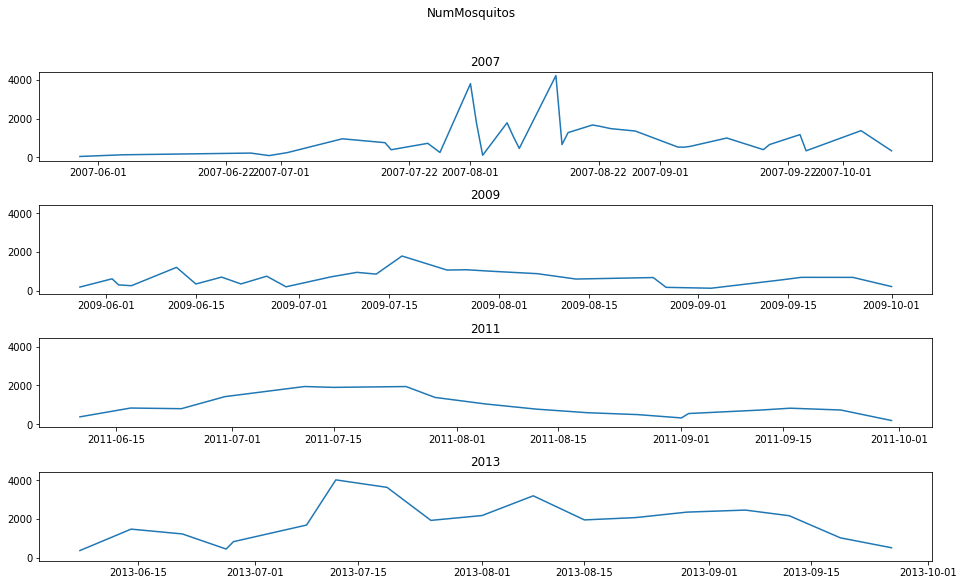

In [65]:
fig, (ax1, ax2, ax3, ax4)  = plt.subplots(nrows=4,ncols=1, figsize=(16,9), sharey=True)
plt.subplots_adjust(hspace=0.5)
plt.suptitle('NumMosquitos')

#2007
ax1.plot(df_train_w[df_train_w['Date'] < ts_2008].groupby('Date')['NumMosquitos'].sum())
ax1.set_title('2007')
#2009
ax2.plot(df_train_w[(df_train_w['Date'] < ts_2010) &(df_train_w['Date'] > ts_2009) ].groupby('Date')['NumMosquitos'].sum())
ax2.set_title('2009')
#2011
ax3.plot(df_train_w[(df_train_w['Date'] < ts_2012) &(df_train_w['Date'] > ts_2010) ].groupby('Date')['NumMosquitos'].sum())
ax3.set_title('2011')
#2013
ax4.plot(df_train_w[(df_train_w['Date'] > ts_2013) ].groupby('Date')['NumMosquitos'].sum())
ax4.set_title('2013');

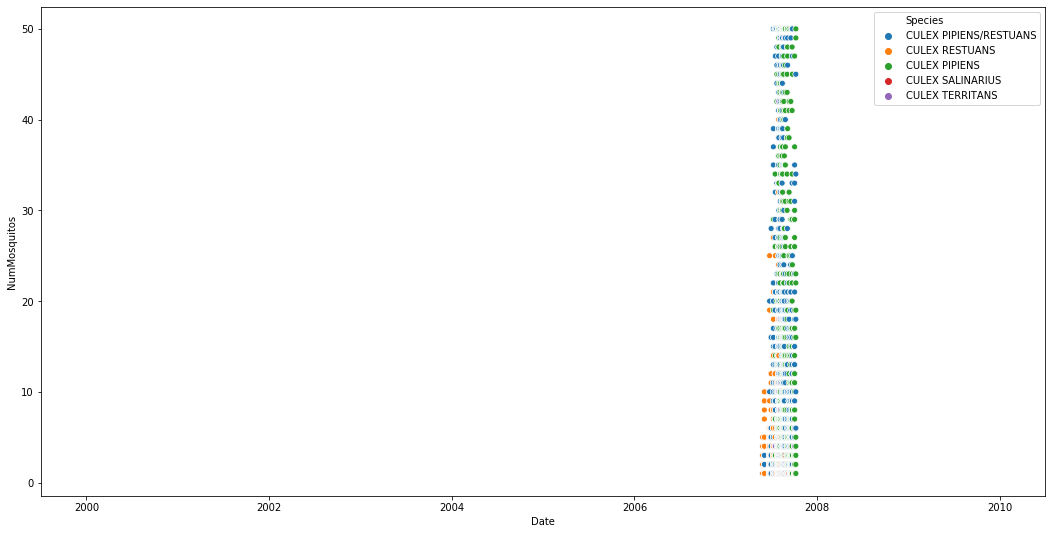

In [66]:
ts_2008 = pd.to_datetime('1/1/2008')
plt.figure(figsize=(18,9))
sns.scatterplot(y= 'NumMosquitos', x= 'Date', hue='Species', data=df_train_w_2[df_train_w_2['Date'] < ts_2008])

In [67]:
df_train_w.head()

,Date,Species,Trap,Latitude,Longitude,NumMosquitos,WnvPresent,Tavg,StnPressure,DewPoint,PrecipTotal,ResultSpeed,daylight
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,41.954690,-87.800991,1,0,75.5,29.415,58.5,0.0,5.8,15.6
1,2007-05-29,CULEX RESTUANS,T002,41.954690,-87.800991,1,0,75.5,29.415,58.5,0.0,5.8,15.6
2,2007-05-29,CULEX RESTUANS,T007,41.994991,-87.769279,1,0,75.5,29.415,58.5,0.0,5.8,15.6
3,2007-05-29,CULEX PIPIENS/RESTUANS,T015,41.974089,-87.824812,1,0,75.5,29.415,58.5,0.0,5.8,15.6
4,2007-05-29,CULEX RESTUANS,T015,41.974089,-87.824812,4,0,75.5,29.415,58.5,0.0,5.8,15.6


In [97]:
df_train_w['NumMosquitos'].sum()

98971

In [68]:
df_train_w_copy = df_train_w.copy()

In [74]:
df_train_w_copy.columns

Index(['Date', 'Species', 'Trap', 'Latitude', 'Longitude', 'NumMosquitos',
       'WnvPresent', 'Tavg', 'StnPressure', 'DewPoint', 'PrecipTotal',
       'ResultSpeed', 'daylight'],
      dtype='object')

In [77]:
aggregation_functions = {'Date':'first', 'Species': 'first', 'Trap':'first', 'Latitude':'first', 
                         'Longitude':'first', 'NumMosquitos':'sum', 'WnvPresent': 'first', 'Tavg':'first',
                         'StnPressure':'first', 'DewPoint':'first', 'PrecipTotal':'first',
                         'ResultSpeed':'first', 'daylight':'first'}

In [86]:
df_train_w_copy = df_train_w.groupby(df_train_w['Date']).groupby('').aggregate(aggregation_functions)

In [99]:
df_nt = df_train_w_copy.groupby(['Date', 'Trap','Species','Latitude','Longitude','WnvPresent']).sum()[["NumMosquitos"]].reset_index()

In [107]:
df_nt['NumMosquitos'].sum()

98971

In [119]:
df_train_w[df_train_w['Date'] < ts_2008].groupby(['Date','Species'])['NumMosquitos'].sum()

Date        Species               
2007-05-29  CULEX PIPIENS               1
            CULEX PIPIENS/RESTUANS     10
            CULEX RESTUANS             29
2007-06-05  CULEX PIPIENS               6
            CULEX PIPIENS/RESTUANS     28
                                     ... 
2007-10-04  CULEX SALINARIUS            1
            CULEX TERRITANS            18
2007-10-09  CULEX PIPIENS             197
            CULEX PIPIENS/RESTUANS    133
            CULEX TERRITANS             3
Name: NumMosquitos, Length: 138, dtype: int64

In [134]:
df_s['Date']

95       2011-09-07
96       2011-09-07
97       2011-09-07
98       2011-09-07
99       2011-09-07
            ...    
14289    2013-09-05
14290    2013-09-05
14291    2013-09-05
14292    2013-09-05
14293    2013-09-05
Name: Date, Length: 14199, dtype: object

In [135]:
df_s['Date'] = pd.to_datetime(df_s['Date'])

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [154]:
df_s['Date'].unique()

array(['2011-09-07T00:00:00.000000000', '2013-07-17T00:00:00.000000000',
       '2013-07-25T00:00:00.000000000', '2013-08-08T00:00:00.000000000',
       '2013-08-15T00:00:00.000000000', '2013-08-16T00:00:00.000000000',
       '2013-08-22T00:00:00.000000000', '2013-08-29T00:00:00.000000000',
       '2013-09-05T00:00:00.000000000'], dtype='datetime64[ns]')

In [104]:
df_nt_2007 = df_nt[df_nt['Date'].dt.year==2007]
df_nt_2009 = df_nt[df_nt['Date'].dt.year==2009]
df_nt_2011= df_nt[df_nt['Date'].dt.year==2011]
df_nt_2013 = df_nt[df_nt['Date'].dt.year==2013]

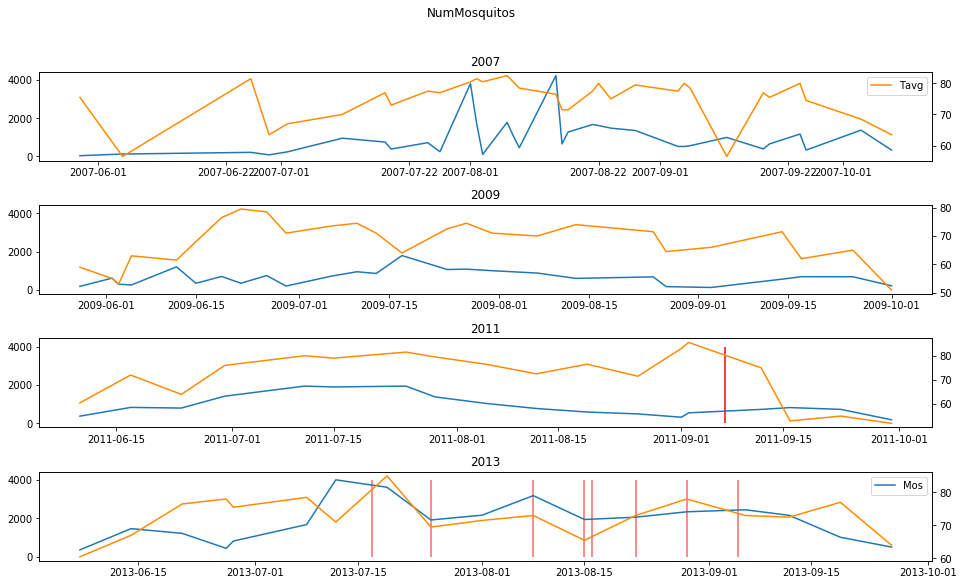

In [176]:
fig, (ax1, ax2, ax3, ax4)  = plt.subplots(nrows=4,ncols=1, figsize=(16,9), sharey=True)
plt.subplots_adjust(hspace=0.5)
plt.suptitle('NumMosquitos')

#2007
ax5=ax1.twinx()
ax1.plot(df_nt_2007.groupby('Date')['NumMosquitos'].sum())
ax5.plot(df_train_w_2[df_train_w_2['Date'] < ts_2008]['Tavg'], color='darkorange', label='Tavg')
ax1.set_title('2007')
ax5.legend()

#2009
ax6=ax2.twinx()
ax6.plot(df_train_w_2[(df_train_w_2['Date'] < ts_2010) & (df_train_w_2['Date'] > ts_2009)]['Tavg'], color='darkorange')
ax2.plot(df_nt_2009.groupby('Date')['NumMosquitos'].sum())
ax2.set_title('2009')

#2011
ax7=ax3.twinx()
ax7.plot(df_train_w_2[(df_train_w_2['Date'] < ts_2012) & (df_train_w_2['Date'] > ts_2010)]['Tavg'], color='darkorange')
ax3.plot(df_nt_2011.groupby('Date')['NumMosquitos'].sum())
ax3.vlines(x='2011-09-07',ymin=0,ymax=4000,color='r')
ax3.set_title('2011')

#2013
ax8=ax4.twinx()
ax8.plot(df_train_w_2[(df_train_w_2['Date'] > ts_2013)]['Tavg'], color='darkorange',label='Tavg')
ax4.plot(df_nt_2013.groupby('Date')['NumMosquitos'].sum(),label='Mos')
for x in df_s['Date'].unique()[1:]:
    ax4.vlines(x=x,ymin=0,ymax=4000,color='r',alpha=0.6)
ax4.set_title('2013');
ax4.legend()

### Mosquitoes

In [ ]:
# Types and prevelance of mosquitoes
df_mosWnv = pd.DataFrame(df_train[['Species','NumMosquitos','WnvPresent']])

In [ ]:
df = df_mosWnv.groupby('Species').sum()
df

In [ ]:
# Subplots
f = plt.figure(figsize=(14,5))

# 1row,2col,1stplot
plt.subplot(1,2,1)
mos_pop = df_mosWnv.groupby('Species')['NumMosquitos'].sum().plot(kind='bar')
plt.title('Mosquito count (by Species)',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);
# 1row,2col,2ndplot
plt.subplot(1,2,2)
mos_pop = df_mosWnv.groupby('Species')['WnvPresent'].sum().plot(kind='bar')
plt.title('Mosquito count (WnV Species)',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

Of the 8 listed species, 3 species are vectors of WNV.

### Traps

In [ ]:
df_train['WnvPresent'].value_counts()

In [ ]:
df_train[df_train['WnvPresent'] == 1]

In [ ]:
# Code from src folder file 'measurement_locations.ipynb


url ='https://raw.githubusercontent.com/AngShengJun/dsi14P4/master/assets/input/mapdata_copyright_openstreetmap_contributors.txt'
mapdata = np.loadtxt(url)
traps = pd.read_csv("https://raw.githubusercontent.com/AngShengJun/dsi14P4/master/assets/input/train.csv")[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']]

# Note we may want to visualise the traps after cleaning of the trap names
# and the cleaning of the spray locations
#traps = df_traps_test


aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(16,20))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

# weather station 1
lats_station1 = 41.995
long_station1 =  -87.933
w_stn_1_scatter = plt.scatter(x=long_station1, y=lats_station1, c='b', s=50)

# weather station 2
lats_station2 = 41.786 
long_station2 = -87.752
w_stn_2_scatter = plt.scatter(x=long_station2, y=lats_station2, c='b', s=50)

# spray data
lats_spray = df_s['Latitude']
long_spray = df_s['Longitude']
spray_scatter = plt.scatter(x=long_spray, y=lats_spray, c='g', s=35)

# trap data
locations = traps[['Longitude', 'Latitude']].drop_duplicates().values
trap_scatter = plt.scatter(locations[:,0], locations[:,1], marker='x', c='crimson', s=50)

# trap data with presence of WNV
lats_wnv = traps[traps['WnvPresent'] == 1]['Latitude']
long_wnv = traps[traps['WnvPresent'] == 1]['Longitude']
wnv_scatter = plt.scatter(x=long_wnv, y=lats_wnv, marker='x', c='darkorange', s=50)

plt.legend({'Weather Station 1': w_stn_1_scatter, 'Weather Station 2':w_stn_2_scatter, 
            'Spray':spray_scatter, 'Traps':trap_scatter, 'Traps with WNV':wnv_scatter});


In [ ]:
# Review quantity and location of traps
# If traps and location tally, the traps should not be repeated 
# after duplicates removed

# Make a copy from train data
df_traps_train = df_train[['Trap', 'Latitude','Longitude']].copy()
# Remove duplicates
df_traps_train.drop_duplicates(inplace=True)

# Return number of traps
print(f"Traps in train data: {len(df_traps_train)}")
# Return distinct instances of traps
print(f"Distinct traps: {len(df_traps_train['Trap'].value_counts())}")

# Check the inconsistency in traps
print("Repeated traps:")
print(df_traps_train['Trap'].value_counts().sort_values(ascending=False).head(2))
print()

# Do the same for Test set
df_traps_test = df_test[['Trap', 'Latitude','Longitude']].copy()
df_traps_test.drop_duplicates(inplace=True)
print(f"Traps in test data: {len(df_traps_test)}")
print(f"Distinct traps: {len(df_traps_test['Trap'].value_counts())}")
print("Repeated traps:")
print(df_traps_test['Trap'].value_counts().sort_values(ascending=False).head(2))

In [ ]:
# Code for data cleaning for traps in both train and test set
# Note this block likely refactor per dataframe for eventual train and testset
# Train set
print("Train set:")
display(df_traps_train.loc[(df_traps_train['Trap']=='T035')|(df_traps_train['Trap']=='T009')])

# Test set
print("Test set:")
display(df_traps_test.loc[(df_traps_test['Trap']=='T035')|(df_traps_test['Trap']=='T009')])

# Change Trap name to deconflict
# Train set index 3867, 6223 to Trap name + A
df_traps_train.loc[3867,'Trap']='T009A'
df_traps_train.loc[6223,'Trap']='T035A'
# Test set index 928, 1096 to Trap name + A
df_traps_test.loc[928,'Trap']='T009A'
df_traps_test.loc[1096,'Trap']='T035A'
# Sanity check
print(f"Distinct traps: {len(df_traps_test['Trap'].value_counts())}")

# Saving to CSV

In [ ]:
# saving to CSV. All final working files will be uploaded onto github
df_train_w.to_csv('./datasets/predict-west-nile-virus/df_train_weather_cleaned.csv')
df_s.to_csv('./datasets/predict-west-nile-virus/df_spray_cleaned.csv')